In [1]:
1) Pick a dataset => Done

2) Pose at least three questions related to business or real-world applications of how the data could be used.=> Done 

understand if there is anything about the properties that helps you predict price. "What are the main factors, which affect the reservation prices? Does time of the year influence prices and What other factors affect the price. Locality , amenities , facilities, reviews or any other "
Can you find negative and positive reviews based on text

how much AirBNB homes are earning in certain time frames and areas. 
You can compare rates between the two cities, 




3) Create a Jupyter Notebook, using any associated packages you'd like, to: => Done

Prepare data:

Gather necessary data to answer your questions => Done
Handle categorical and missing data 
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize

Provide a clear connection between your business questions and how the data answers them.
4) Communicate your business insights:

Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
Create a blog post to share your questions and insights with a non-technical audience
Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!



SyntaxError: invalid syntax (<ipython-input-1-872815d802a9>, line 1)

# Importing Packages and librares


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [66]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = 0

# Importing data 

In [67]:
Cal_s_df = pd.read_csv('./Seattle/calendar.csv') # This dataframe contain for each date if the listing id is available or no"
listing_s_df = pd.read_csv('./Seattle/listings.csv') #This data frame contain list of all seattle
reviews_s_df = pd.read_csv('./Seattle/reviews.csv') #This dataframe contain reviews for each person for each seattle 

In [68]:
Cal_b_df = pd.read_csv('./Boston/calendar.csv') # This dataframe contain for each date if the listing id is available or no"
listing_b_df = pd.read_csv('./Boston/listings.csv') #This data frame contain list of all seattle
reviews_b_df = pd.read_csv('./Boston/reviews.csv') #This dataframe contain reviews for each person for each seattle 

# Data Overview

In [168]:
print('Seattle Calander data set Count of rows and columns '+ str(Cal_s_df.shape))
print('Seattle Listing data set Count of rows and columns '+str(listing_s_df.shape))
print('Seattle Reviews data set Count of rows and columns '+str(reviews_s_df.shape))


Seattle Calander data set Count of rows and columns (1393570, 4)
Seattle Listing data set Count of rows and columns (3818, 93)
Seattle Reviews data set Count of rows and columns (84849, 6)


In [169]:
print('Boston Calander data set Count of rows and columns '+ str(Cal_b_df.shape))
print('Boston Listing data set Count of rows and columns '+str(listing_b_df.shape))
print('Boston Reviews data set Count of rows and columns '+str(reviews_b_df.shape))


Boston Calander data set Count of rows and columns (1308890, 4)
Boston Listing data set Count of rows and columns (3585, 95)
Boston Reviews data set Count of rows and columns (68275, 6)


In [170]:
listing_s_df.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,City_x
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Boston
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,Boston
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,N

In [171]:
Cal_s_df.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [172]:
reviews_s_df.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


# Listing Data frame checking Data Types and Nulls

### Checking count of rows and data type for each column 

In [173]:
listing_s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 93 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

As we see above that there are columns that will need to convert data types of it like id need to be string to work as categorical variable, price needs to be numric formar

In [174]:
listing_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

As we see that the number of columns for boston data set not the same as Seattle dataset so we will need to drop the extra columns to merge the datasets

In [175]:
listing_b_df_Ex_ExtraCol=listing_b_df.drop(['access','interaction','house_rules'],axis=1)

In [176]:
listing_b_df_Ex_ExtraCol['City_x']="Seattle"
listing_s_df['City_x']="Boston"
frames = [listing_b_df_Ex_ExtraCol, listing_s_df]
Listing_All_df = pd.concat(frames)

Now we have combined dataset for listings seattle and boston

In [177]:
Listing_All_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7403 entries, 0 to 3817
Data columns (total 93 columns):
id                                  7403 non-null int64
listing_url                         7403 non-null object
scrape_id                           7403 non-null int64
last_scraped                        7403 non-null object
name                                7403 non-null object
summary                             7083 non-null object
space                               5777 non-null object
description                         7403 non-null object
experiences_offered                 7403 non-null object
neighborhood_overview               4956 non-null object
notes                               3822 non-null object
transit                             5179 non-null object
thumbnail_url                       6484 non-null object
medium_url                          6484 non-null object
picture_url                         7403 non-null object
xl_picture_url                      6484

###  Checking propotion of Null values for each column

In [178]:
ls_All_Null_Prop=((Listing_All_df.isnull().sum()/ len(Listing_All_df))*100).to_frame()
ls_All_Null_Prop.sort_values(by=[0], inplace=True,ascending=False)
ls_All_Null_Prop

,0
license,100.000000
square_feet,97.933270
monthly_price,67.513170
weekly_price,60.813184
security_deposit,56.666216
neighbourhood_group_cleansed,48.426314
has_availability,48.426314
jurisdiction_names,48.426314
notes,48.372282
neighborhood_overview,33.054167


As we see that there are multiple columns that have null values so we will see how we will work with each type 

# Calander Data frame checking Data Types and Nulls

###  Checking count of rows and data type for each column 

In [179]:
Cal_s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


As we see that we will need to convert date column to date type and we can extract month and year to make analysis using them,and price column needs to be numric

In [180]:
Cal_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [181]:
frames_cal = [Cal_s_df, Cal_b_df]
Cal_All_df = pd.concat(frames_cal)

Now we have combined dataset for calander seattle and boston

In [183]:
Cal_All_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702460 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 103.1+ MB


###  Checking propotion of Null values for each column

In [17]:
Cal_All_Null_Prop=((Cal_All_df.isnull().sum()/ len(Cal_All_df))*100).to_frame()
Cal_All_Null_Prop.sort_values(by=[0], inplace=True,ascending=False)
Cal_All_Null_Prop

,0
price,41.624335
listing_id,0.000000
date,0.000000
available,0.000000


As we see that the price column is only that contain null values when the listing were not available 

In [10]:
Cal_All_df['Price_is_null']=Cal_All_df['price'].isnull()
Cal_All_df.head(5)

,listing_id,date,available,price,Price_is_null
0,241032,2016-01-04,t,$85.00,False
1,241032,2016-01-05,t,$85.00,False
2,241032,2016-01-06,f,NaN,True
3,241032,2016-01-07,f,NaN,True
4,241032,2016-01-08,f,NaN,True


# Data Prepration 

### 1-  Merge Data frames

In [187]:
Listing_All_df=Listing_All_df.rename(columns = {'id' : 'listing_id'})
Merged_df= pd.merge(Listing_All_df , Cal_All_df, on = 'listing_id')


### 2- Drop Extra Columns

In [188]:
columns_to_drop = [ 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month','city']

In [189]:
Merged_df_Ex_Col = Merged_df.drop( columns_to_drop,axis=1)


In [190]:
Merged_df_Ex_Col.head(5)

,listing_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price_x,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,City_x,date,available
0,12147973,2015-04-15,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,Seattle,2017-09-05,f
1,12147973,2015-04-15,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,Seattle,2017-09-04,f
2,12147973,2015-04-15,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,Seattle,2017-09-03,f
3,12147973,2015-04-15,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,Seattle,2017-09-02,f
4,12147973,2015-04-15,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,Seattle,2017-09-01,f


### 3-  Extract Month and year from Date column

In [191]:
def get_month(x):
    '''
    Get month from date represented as a string
    Input : Dataframe
    Output: Month as it's the second index after"-"
    '''
    return int(x['date'].split('-')[1])

def get_year(x):
    '''
    Get year from date represented as a string
    Input : Dataframe
    Output: Year as it's the second index after"-"
    '''
    return int(x['date'].split('-')[0])


In [193]:
Merged_df_Ex_Col['month'] = Merged_df_Ex_Col.apply(lambda x: get_month(x),axis=1)


In [192]:
Merged_df_Ex_Col['year'] = Merged_df_Ex_Col.apply(lambda x: get_year(x),axis=1)


In [194]:
Merged_df_Ex_Col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702460 entries, 0 to 2702459
Data columns (total 43 columns):
listing_id                          int64
host_since                          object
host_response_time                  object
host_response_rate                  object
host_is_superhost                   object
host_listings_count                 float64
host_verifications                  object
host_has_profile_pic                object
host_identity_verified              object
neighbourhood_group_cleansed        object
property_type                       object
room_type                           object
accommodates                        int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                            object
amenities                           object
square_feet                         float64
price_x                             object
guests_included         

### 4- Convert Type of price and host_response_rate Column

In [223]:
Merged_df_Ex_Col['price'] = Merged_df_Ex_Col['price_x'].astype(str)
Merged_df_Ex_Col['price'] = Merged_df_Ex_Col['price'].str.replace('[$, ]', '').astype("float")
Merged_df_Ex_Col = Merged_df_Ex_Col.drop('price_x',axis=1)
Merged_df_Ex_Col['price'].head(5)


Merged_df_Ex_Col['host_response_rate'] = Merged_df_Ex_Col['host_response_rate'].astype(str)
Merged_df_Ex_Col['host_response_rate'] = Merged_df_Ex_Col['host_response_rate'].str.replace('[%, ]', '').astype("float")



### 5- How we will deal with Null values 

In [224]:
Merged_df_Ex_Col_null=((Merged_df_Ex_Col.isnull().sum()/ len(Merged_df_Ex_Col))*100).to_frame()
Merged_df_Ex_Col_null.sort_values(by=[0], inplace=True,ascending=False)
Merged_df_Ex_Col_null

,0
neighbourhood_group_cleansed,48.433279
host_response_time,13.425176
host_response_rate,13.425176
host_is_superhost,0.027012
host_has_profile_pic,0.027012
host_identity_verified,0.027012
host_since,0.027012
listing_id,0.000000
require_guest_profile_picture,0.000000
review_scores_checkin,0.000000


#### * For columns that have greater than 90% Null values we will exclude those columns


In [225]:
Merged_df_Ex_Col=Merged_df_Ex_Col.drop(['license','square_feet'], axis=1)

ValueError: labels ['license' 'square_feet'] not contained in axis

#### * For Numeric Columns we will impute the null values using mean 

In [226]:
Merged_df_Ex_Col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702460 entries, 0 to 2702459
Data columns (total 41 columns):
listing_id                          int64
host_since                          object
host_response_time                  object
host_response_rate                  float64
host_is_superhost                   object
host_listings_count                 float64
host_verifications                  object
host_has_profile_pic                object
host_identity_verified              object
neighbourhood_group_cleansed        object
property_type                       object
room_type                           object
accommodates                        int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                            object
amenities                           object
guests_included                     int64
extra_people                        object
minimum_nights           

In [229]:
Numeric_columns = ['host_listings_count','bathrooms','bedrooms','beds','review_scores_rating', 'review_scores_accuracy',
                   'review_scores_cleanliness','review_scores_checkin'
                   , 'review_scores_communication', 'review_scores_location','review_scores_value','host_response_rate']
for column in Numeric_columns:
        Merged_df_Ex_Col[column].fillna(Merged_df_Ex_Col[column].mean(), inplace = True)

#### * For Categorical Columns we will impute the null values using Mode

In [219]:
Merged_df_Ex_Col[['neighbourhood_group_cleansed','host_response_time','host_response_rate','host_is_superhost','host_has_profile_pic','host_identity_verified']].tail(5)

,neighbourhood_group_cleansed,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified
2702455,Queen Anne,within a day,100%,f,t,t
2702456,Queen Anne,within a day,100%,f,t,t
2702457,Queen Anne,within a day,100%,f,t,t
2702458,Queen Anne,within a day,100%,f,t,t
2702459,Queen Anne,within a day,100%,f,t,t


In [237]:
Categorical_Column=['host_is_superhost','host_has_profile_pic','host_identity_verified','host_response_time']
for column in Categorical_Column:
        Merged_df_Ex_Col[column] = Merged_df_Ex_Col[column].fillna(Merged_df_Ex_Col[column].mode()[0])

In [238]:
Merged_df_Ex_Col_null=((Merged_df_Ex_Col.isnull().sum()/ len(Merged_df_Ex_Col))*100).to_frame()
Merged_df_Ex_Col_null.sort_values(by=[0], inplace=True,ascending=False)
Merged_df_Ex_Col_null

,0
neighbourhood_group_cleansed,48.433279
host_since,0.027012
cancellation_policy,0.000000
review_scores_rating,0.000000
review_scores_accuracy,0.000000
review_scores_cleanliness,0.000000
review_scores_checkin,0.000000
review_scores_communication,0.000000
review_scores_location,0.000000
review_scores_value,0.000000


# Data Analysis 

### * Find range of value for year

In [239]:

print('Minimum price per listing is %d' % (Merged_df_Ex_Col['year'].min()))
print('Maximum price per listing is %d' % (Merged_df_Ex_Col['year'].max()))


Minimum price per listing is 2016
Maximum price per listing is 2017


In [86]:
Avg_df=Merged_df_Ex_Col.groupby(by=["year","month","City_x"]).mean()

Listing Distubution over price

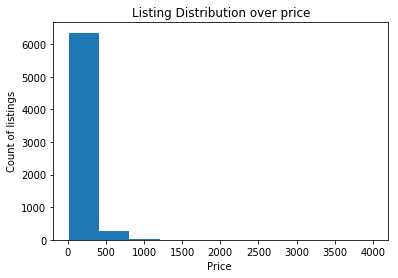

In [138]:
#get the average price for each listing
mean_price_for_listing = Merged_df_Ex_Col_avail.groupby('listing_id').mean()['price']

#plot
plt.hist(mean_price_for_listing, bins=10)
plt.ylabel('Count of listings')
plt.xlabel('Price ')
plt.title('Listing Distribution over price')

plt.show()

listing distibution over property_type

Text(0.5,1,'Property Type Distribution')

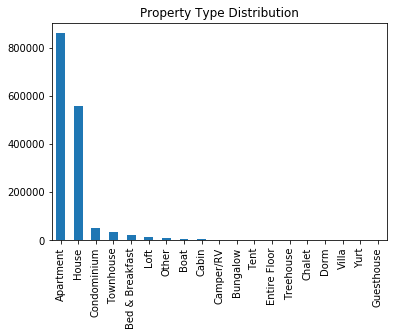

In [164]:
#get the average price for each listing
#count_ls_for_type = Merged_df_Ex_Col_avail.groupby('property_type').count()['listing_id']
#count_ls_for_type

count_ls_for_type=Merged_df_Ex_Col_avail.property_type.value_counts()
count_ls_for_type.plot(kind="Bar")
plt.title("Property Type Distribution")

In [25]:
#get the average price for each listing
mean_price_for_listing = Merged_df_Ex_Col_avail.groupby('listing_id').mean()['price']

#plot
plt.hist(mean_price_for_listing, bins=10)
plt.ylabel('Count of listings')
plt.xlabel('Price ')
plt.title('Listing Distribution over price')

plt.show()reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84832 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [26]:
reviews_df.isnull().sum()


listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         17
dtype: int64

# Price Prediction

### Correlation Matrix 

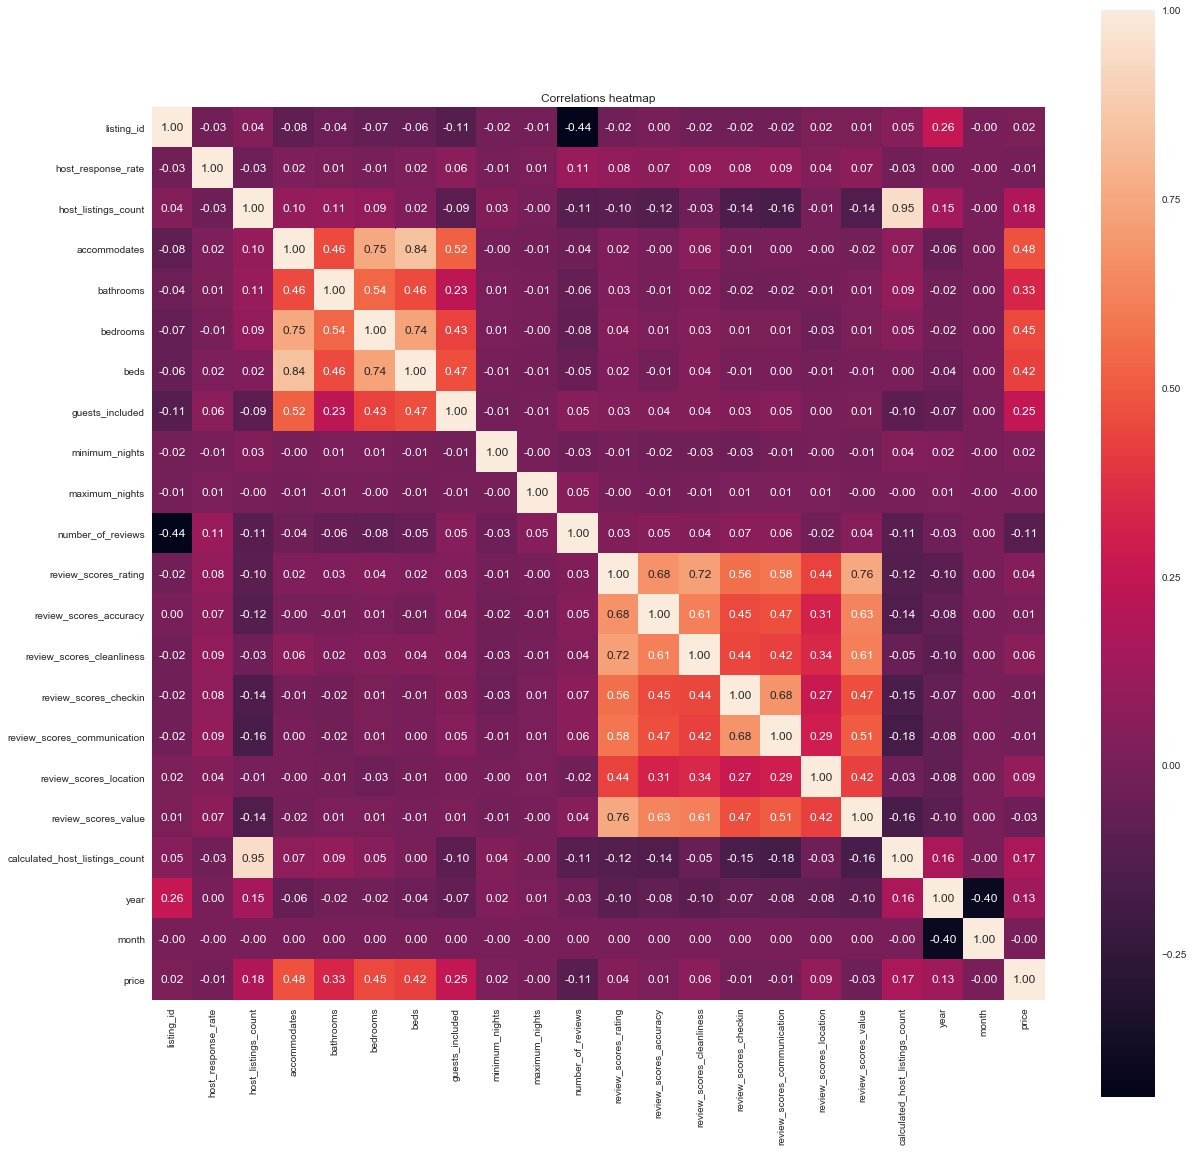

In [246]:
sns.set(font_scale=20)
sns.set(rc={'figure.figsize':(20,20)})
hm=sns.heatmap(Merged_df_Ex_Col.corr(), cbar = True, annot=True, square = True, fmt = '.2f').set_title('Correlations heatmap')

fig = hm.get_figure()
fig.savefig('correlations.png')

In [264]:
Merged_df_Ex_Col.tail(5)
Merged_df_Ex_Col=Merged_df_Ex_Col.drop(['listing_id','host_since','neighbourhood_group_cleansed','amenities','extra_people'],axis=1)
Merged_df_Ex_Col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702460 entries, 0 to 2702459
Data columns (total 36 columns):
host_response_time                  object
host_response_rate                  float64
host_is_superhost                   object
host_listings_count                 float64
host_verifications                  object
host_has_profile_pic                object
host_identity_verified              object
property_type                       object
room_type                           object
accommodates                        int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                            object
guests_included                     int64
minimum_nights                      int64
maximum_nights                      int64
number_of_reviews                   int64
review_scores_rating                float64
review_scores_accuracy              float64
review_scores_cleanliness

### Split Data into train and test
Based on result of correlation matrix so we should choose which features that need to be the input for the model

In [280]:

'''X=Merged_df_Ex_Col[['host_listings_count','bathrooms','bedrooms','beds','property_type','accommodates']]
cat_columns = list(X.select_dtypes(include=['object']).columns)
cat_columns=['property_type']
for col in  cat_columns:
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=True)], axis=1)
'''

X= Merged_df_Ex_Col[['host_listings_count','bathrooms','bedrooms','beds','accommodates']]
Y=Merged_df_Ex_Col['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .30, random_state=42)


### Use Linear Regression To predict Price

In [281]:
lm_model = LinearRegression(normalize=True) 

lm_model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### Predict based on Testing Data and score it using r-sqaure

In [282]:
y_test_preds = lm_model.predict(X_test)  # Predictions here
r2_test = r2_score(y_test, y_test_preds) # Rsquared here

r2_test

0.27176496861720978